<a href="https://colab.research.google.com/github/Srm-Akla/FL_SW_network_UAV/blob/main/FL_SW_network_for_UAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Globals

## Importing Libraries

In [1]:
# Author: Srm-Akla

import pandas
import numpy as np
import itertools
import networkx as nx
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
pandas.set_option("display.max_rows", None)

## Variables

Defining global variables and constants

In [2]:
N_DRONES = 501
LAYER_LENGTH = 1000
LAYER_HEIGHT = [100, 200, 300, 400]
CONV_DIST = 170

## Creating Dataframe and generating coordinates

- Generating random x,y,z values and adding it to dataframe. 
- Assigning the coordinates of base station to the first index of dataframe
- Combining x,y,z values to a new colume in dataframe

In [3]:
np.random.seed(42)
df = pandas.DataFrame()
df["X"] = np.full(N_DRONES, np.random.randint(0,LAYER_LENGTH, size=N_DRONES))
df["Y"] = np.full(N_DRONES, np.random.randint(0,LAYER_LENGTH, size=N_DRONES))
df["Z"] = np.array([np.random.choice(LAYER_HEIGHT, size=1) for _ in range(N_DRONES)], dtype=np.int64)

df["X"][0] = 500
df["Y"][0] = 500
df["Z"][0] = 0

df["Coords"] = df[['X', 'Y', 'Z']].apply(tuple, axis=1)
df

,X,Y,Z,Coords
0,500,500,0,"(500, 500, 0)"
1,435,685,400,"(435, 685, 400)"
2,860,791,100,"(860, 791, 100)"
3,270,625,200,"(270, 625, 200)"
4,106,287,100,"(106, 287, 100)"
5,71,942,200,"(71, 942, 200)"
6,700,853,400,"(700, 853, 400)"
7,20,662,300,"(20, 662, 300)"
8,614,961,100,"(614, 961, 100)"
9,121,638,300,"(121, 638, 300)"


# Splitting the drones into clusters.

Dividing the layer into 4 clusters and adding the values to new columes

In [4]:

# A = (df["X"]<= 500) & (df["Y"] <= 500)
# B = (df["X"] > 500) & (df["Y"] <= 500)
# C = (df["X"]<= 500) & (df["Y"] > 500)
# D = (df["X"] > 500) & (df["Y"] > 500)
A = (df["Z"] <= 100)
B = (df["Z"] == 200)
C = (df["Z"] == 300)
D = (df["Z"] == 400)
#df['day3'] = np.where(A, (df["X"],df["Y"]), 0)
df.loc[A, 'ClusterA'] = df[['X', 'Y', 'Z']].apply(tuple, axis=1)
df.loc[~A, 'ClusterA'] = "NaN"

df.loc[B, 'ClusterB'] = df[['X', 'Y', 'Z']].apply(tuple, axis=1)
df.loc[~B, 'ClusterB'] = "NaN"

df.loc[C, 'ClusterC'] = df[['X', 'Y', 'Z']].apply(tuple, axis=1)
df.loc[~C, 'ClusterC'] = "NaN"

df.loc[D, 'ClusterD'] = df[['X', 'Y', 'Z']].apply(tuple, axis=1)
df.loc[~D, 'ClusterD'] = "NaN"

del A,B,C,D

df


,X,Y,Z,Coords,ClusterA,ClusterB,ClusterC,ClusterD
0,500,500,0,"(500, 500, 0)","(500, 500, 0)",NaN,NaN,NaN
1,435,685,400,"(435, 685, 400)",NaN,NaN,NaN,"(435, 685, 400)"
2,860,791,100,"(860, 791, 100)","(860, 791, 100)",NaN,NaN,NaN
3,270,625,200,"(270, 625, 200)",NaN,"(270, 625, 200)",NaN,NaN
4,106,287,100,"(106, 287, 100)","(106, 287, 100)",NaN,NaN,NaN
5,71,942,200,"(71, 942, 200)",NaN,"(71, 942, 200)",NaN,NaN
6,700,853,400,"(700, 853, 400)",NaN,NaN,NaN,"(700, 853, 400)"
7,20,662,300,"(20, 662, 300)",NaN,NaN,"(20, 662, 300)",NaN
8,614,961,100,"(614, 961, 100)","(614, 961, 100)",NaN,NaN,NaN
9,121,638,300,"(121, 638, 300)",NaN,NaN,"(121, 638, 300)",NaN


In [5]:
df_clusters = pandas.DataFrame()

df_a = pandas.DataFrame(np.array(df[df["ClusterA"] != "NaN"].index),columns=["A"])
df_b = pandas.DataFrame(np.array(df[df["ClusterB"] != "NaN"].index),columns=["B"])
df_c = pandas.DataFrame(np.array(df[df["ClusterC"] != "NaN"].index),columns=["C"])
df_d = pandas.DataFrame(np.array(df[df["ClusterD"] != "NaN"].index),columns=["D"])

df_clusters = pandas.concat([df_a,df_b, df_c, df_d],axis=1)

del df_a, df_b, df_c, df_d

df_clusters = df_clusters.fillna("NaN")
df_clusters


,A,B,C,D
0,0.0,3,7.0,1.0
1,2.0,5,9.0,6.0
2,4.0,11,12.0,26.0
3,8.0,14,15.0,29.0
4,10.0,20,16.0,53.0
5,13.0,28,22.0,57.0
6,17.0,34,23.0,58.0
7,18.0,41,27.0,60.0
8,19.0,42,32.0,62.0
9,21.0,46,35.0,72.0


# Graph

In [6]:
FIGSIZE = [20,17]

def plot_nodes(fig, node, length, d=None):
    colors = "blue"
    for i in range(len(node)):
        xi = node[i][0]
        yi = node[i][1]
        zi = node[i][2]
        if (zi == 100):
            colors = 'C0'
        elif (zi == 200):
            colors = 'C3'
        elif (zi == 300):
            colors = 'C2'
        elif (zi == 400):
            colors = 'C1'
        fig.scatter(xi, yi, zi, c=colors, edgecolors="yellow", alpha=1)
        #print(i)
        if d == "3d":
            fig.text(xi,yi,zi, s=i, c='C4', alpha=0.8)
        else: 
            fig.text(xi,yi, s=i, c='C4', alpha=0.8)

def plot_edges(fig, edge, nodeX, nodeY, nodeZ, colors):
    for i,j in edge:
        x = np.array((nodeX[i],nodeX[j]))
        y = np.array((nodeY[i],nodeY[j]))
        z = np.array((nodeZ[i],nodeZ[j]))
        fig.plot(x,y,z,c=colors,alpha=0.3, label="something", linewidth=2)

# Getting Cluster Links

## Finding all possible links.

In [7]:
y = list(itertools.combinations(df_clusters.columns, 2))
z = list(itertools.combinations(df_clusters.columns, 1))

def get_links(nodes1, nodes2, k):
    for i in nodes1:
        for j in nodes2:
            if (i == "NaN") or (j == "NaN"):
                break
            if i == j:
                pass
            else: 
                k.add_edge(i,j)
    return k.edges

cluster_edges = { "AB_edges": [], "AC_edges" : [], "AD_edges" : [], "BC_edges" : [], "BD_edges" : [], "CD_edges": [] }
for i,k in enumerate(cluster_edges):
    cluster_edges[k] = nx.Graph()
    get_links(df_clusters[y[i][0]], df_clusters[y[i][1]], cluster_edges[k])
    

print(cluster_edges["AC_edges"].edges)

single_cluster_edges = { "AA_edges": [], "BB_edges" : [], "CC_edges" : [], "DD_edges" : [] }
for i,k in enumerate(single_cluster_edges):
    single_cluster_edges[k] = nx.Graph()
    get_links(df_clusters[z[i][0]], df_clusters[z[i][0]], single_cluster_edges[k])
print(single_cluster_edges["AA_edges"].edges)

[(0.0, 7.0), (0.0, 9.0), (0.0, 12.0), (0.0, 15.0), (0.0, 16.0), (0.0, 22.0), (0.0, 23.0), (0.0, 27.0), (0.0, 32.0), (0.0, 35.0), (0.0, 37.0), (0.0, 43.0), (0.0, 50.0), (0.0, 61.0), (0.0, 63.0), (0.0, 69.0), (0.0, 70.0), (0.0, 79.0), (0.0, 83.0), (0.0, 84.0), (0.0, 85.0), (0.0, 86.0), (0.0, 91.0), (0.0, 92.0), (0.0, 93.0), (0.0, 103.0), (0.0, 104.0), (0.0, 105.0), (0.0, 106.0), (0.0, 113.0), (0.0, 116.0), (0.0, 118.0), (0.0, 138.0), (0.0, 139.0), (0.0, 141.0), (0.0, 142.0), (0.0, 143.0), (0.0, 145.0), (0.0, 146.0), (0.0, 148.0), (0.0, 149.0), (0.0, 158.0), (0.0, 160.0), (0.0, 161.0), (0.0, 167.0), (0.0, 168.0), (0.0, 189.0), (0.0, 193.0), (0.0, 196.0), (0.0, 199.0), (0.0, 200.0), (0.0, 209.0), (0.0, 212.0), (0.0, 213.0), (0.0, 214.0), (0.0, 220.0), (0.0, 227.0), (0.0, 229.0), (0.0, 230.0), (0.0, 231.0), (0.0, 232.0), (0.0, 233.0), (0.0, 235.0), (0.0, 236.0), (0.0, 242.0), (0.0, 243.0), (0.0, 244.0), (0.0, 247.0), (0.0, 251.0), (0.0, 254.0), (0.0, 266.0), (0.0, 270.0), (0.0, 272.0), (0.0

### Plotting Graph

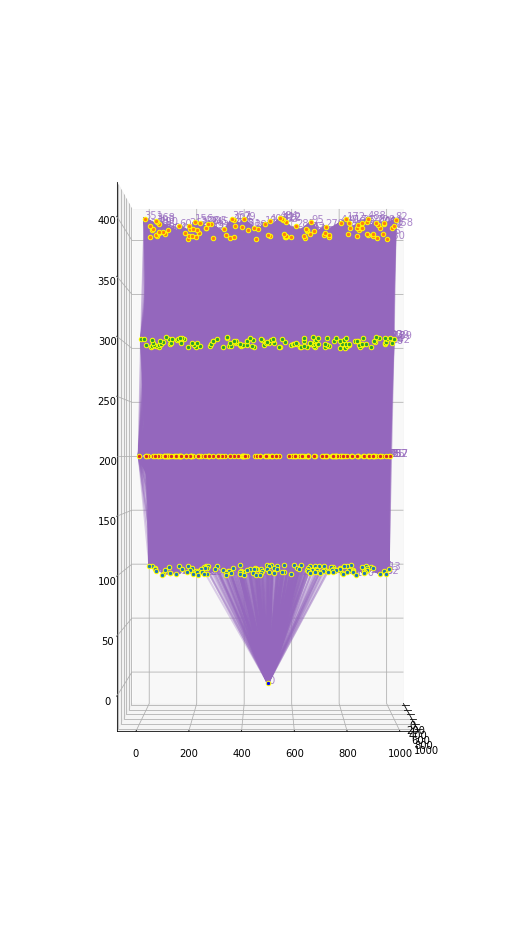

In [8]:
fig = plt.figure(figsize=FIGSIZE)
d = "3d"
ax = fig.add_subplot(1,2,1, projection=d)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)

for k in cluster_edges:
    plot_edges(ax, list(cluster_edges[k].edges), df["X"], df["Y"], df["Z"], "C4")

ax.view_init(0,0)
plt.show()

 ## Finding Conventional and Long range links.

In [9]:
def get_conv_links(node1, node2, edges, conv_dist, k):
    d = []
    result = np.nan
    for i,j in edges:
        result = math.dist(node1[i], node2[j])
        d.append(result)
        if result <= conv_dist:
            k.add_edge(i, j)
    
    return k.edges, max(d)

def get_long_links( node1, node2, edges, conv_dist, d_max, k):
    result = np.nan
    for i,j in edges:
        result = math.dist(node1[i], node2[j])
        if (conv_dist <= result) and (result <= 0.5*d_max):
            k.add_edge(i, j)
    
    return k.edges

In [10]:
cluster_conv_graph = { "AB_edges": [], "AC_edges" : [], "AD_edges" : [], "BC_edges" : [], "BD_edges" : [], "CD_edges": [] }
cluster_long_graph = { "AB_edges": [], "AC_edges" : [], "AD_edges" : [], "BC_edges" : [], "BD_edges" : [], "CD_edges": [] }
#     get_conv_links(df_clusters[y[i][0]], df_clusters[y[i][1]], conv_cluster_links[k])
for i in cluster_edges:
    cluster_conv_graph[i] = nx.Graph()
    cluster_long_graph[i] = nx.Graph()
    l, d_max = get_conv_links(df["Coords"], df["Coords"], cluster_edges[i].edges, CONV_DIST, cluster_conv_graph[i])
    m = get_long_links(df["Coords"], df["Coords"], cluster_edges[i].edges, CONV_DIST, d_max, cluster_long_graph[i])

single_cluster_conv_graph = { "AA_edges": [], "BB_edges" : [], "CC_edges" : [], "DD_edges" : [] }

for i in single_cluster_edges:
    single_cluster_conv_graph[i] = nx.Graph()
    l, d_max = get_conv_links(df["Coords"], df["Coords"], single_cluster_edges[i].edges, CONV_DIST, single_cluster_conv_graph[i])

cluster_long_graph["AB_edges"].edges

EdgeView([(0.0, 3), (0.0, 11), (0.0, 14), (0.0, 20), (0.0, 28), (0.0, 34), (0.0, 41), (0.0, 42), (0.0, 46), (0.0, 48), (0.0, 54), (0.0, 59), (0.0, 64), (0.0, 65), (0.0, 66), (0.0, 67), (0.0, 68), (0.0, 71), (0.0, 74), (0.0, 78), (0.0, 89), (0.0, 90), (0.0, 94), (0.0, 97), (0.0, 98), (0.0, 99), (0.0, 100), (0.0, 101), (0.0, 102), (0.0, 107), (0.0, 110), (0.0, 115), (0.0, 117), (0.0, 123), (0.0, 126), (0.0, 132), (0.0, 133), (0.0, 135), (0.0, 137), (0.0, 150), (0.0, 164), (0.0, 171), (0.0, 173), (0.0, 175), (0.0, 177), (0.0, 182), (0.0, 183), (0.0, 184), (0.0, 186), (0.0, 187), (0.0, 191), (0.0, 195), (0.0, 198), (0.0, 204), (0.0, 216), (0.0, 217), (0.0, 218), (0.0, 221), (0.0, 223), (0.0, 225), (0.0, 226), (0.0, 234), (0.0, 239), (0.0, 240), (0.0, 241), (0.0, 250), (0.0, 255), (0.0, 256), (0.0, 257), (0.0, 265), (0.0, 269), (0.0, 273), (0.0, 274), (0.0, 281), (0.0, 284), (0.0, 286), (0.0, 288), (0.0, 293), (0.0, 298), (0.0, 300), (0.0, 301), (0.0, 305), (0.0, 307), (0.0, 308), (0.0, 309

### Merging conventional links between clusters and within clusters

In [11]:
temp_var = list(itertools.combinations(list(single_cluster_conv_graph.keys()),2))
for i,j in enumerate(cluster_conv_graph):
    #edges = 
    #edges2 = single_cluster_conv_graph[temp_var[i][0]].edges
    cluster_conv_graph[j].add_edges_from(single_cluster_conv_graph[temp_var[i][0]].edges)
    cluster_conv_graph[j].add_edges_from(single_cluster_conv_graph[temp_var[i][1]].edges)
    print(j, temp_var[i][0], temp_var[i][1])
    print("Next Loop")
    #print(single_cluster_conv_graph[temp_var[i][1]].edges)

del temp_var
len(cluster_conv_graph['AB_edges'].edges)

AB_edges AA_edges BB_edges
Next Loop
AC_edges AA_edges CC_edges
Next Loop
AD_edges AA_edges DD_edges
Next Loop
BC_edges BB_edges CC_edges
Next Loop
BD_edges BB_edges DD_edges
Next Loop
CD_edges CC_edges DD_edges
Next Loop


2398

### Plotting Graph

#### Conventional Graph

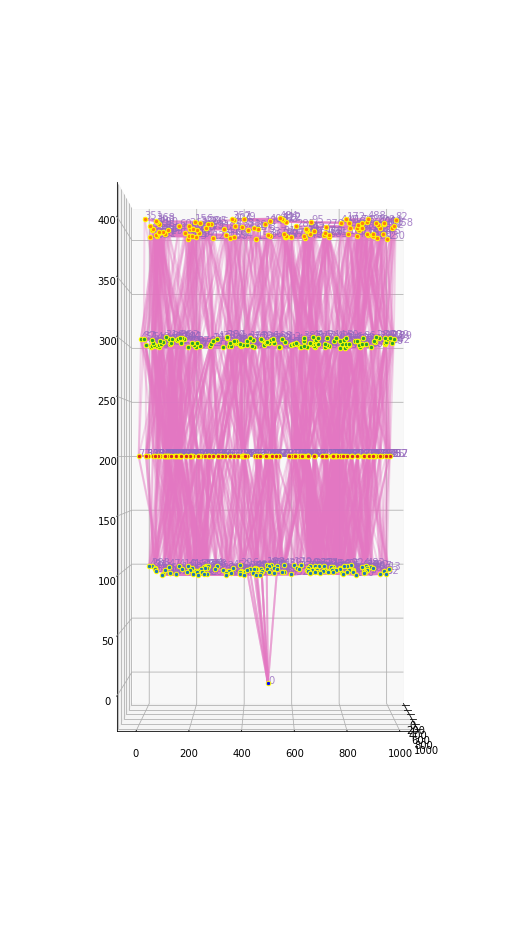

In [12]:
fig = plt.figure(figsize=FIGSIZE)
d = "3d"
ax = fig.add_subplot(1,2,1, projection=d)

total_cluster_conv_graph = nx.Graph()
total_cluster_conv_graph.add_nodes_from(df["Coords"].index)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)

for k in cluster_edges:
    plot_edges(ax, list(cluster_conv_graph[k].edges), df["X"], df["Y"], df["Z"], "C6")
    total_cluster_conv_graph.add_edges_from(cluster_conv_graph[k].edges)

ax.view_init(0,0)
#fig.savefig(fname="long_Cluster2.png", bbox_inches="tight")

# ax2 = fig.add_subplot(1,2,2, projection=d)

# total_cluster_conv_graph = nx.Graph()
# total_cluster_conv_graph.add_nodes_from(df["Coords"].index)

# plot_nodes(ax2, df["Coords"], LAYER_LENGTH, d)

# for k in cluster_edges:
#     plot_edges(ax2, list(cluster_conv_graph[k].edges), df["X"], df["Y"], df["Z"], "C4")
#     total_cluster_conv_graph.add_edges_from(cluster_conv_graph[k].edges)

# ax2.view_init(120,60)
#fig.savefig(fname="long_Cluster2.png", bbox_inches="tight")
plt.show()


#### Long-range Graph

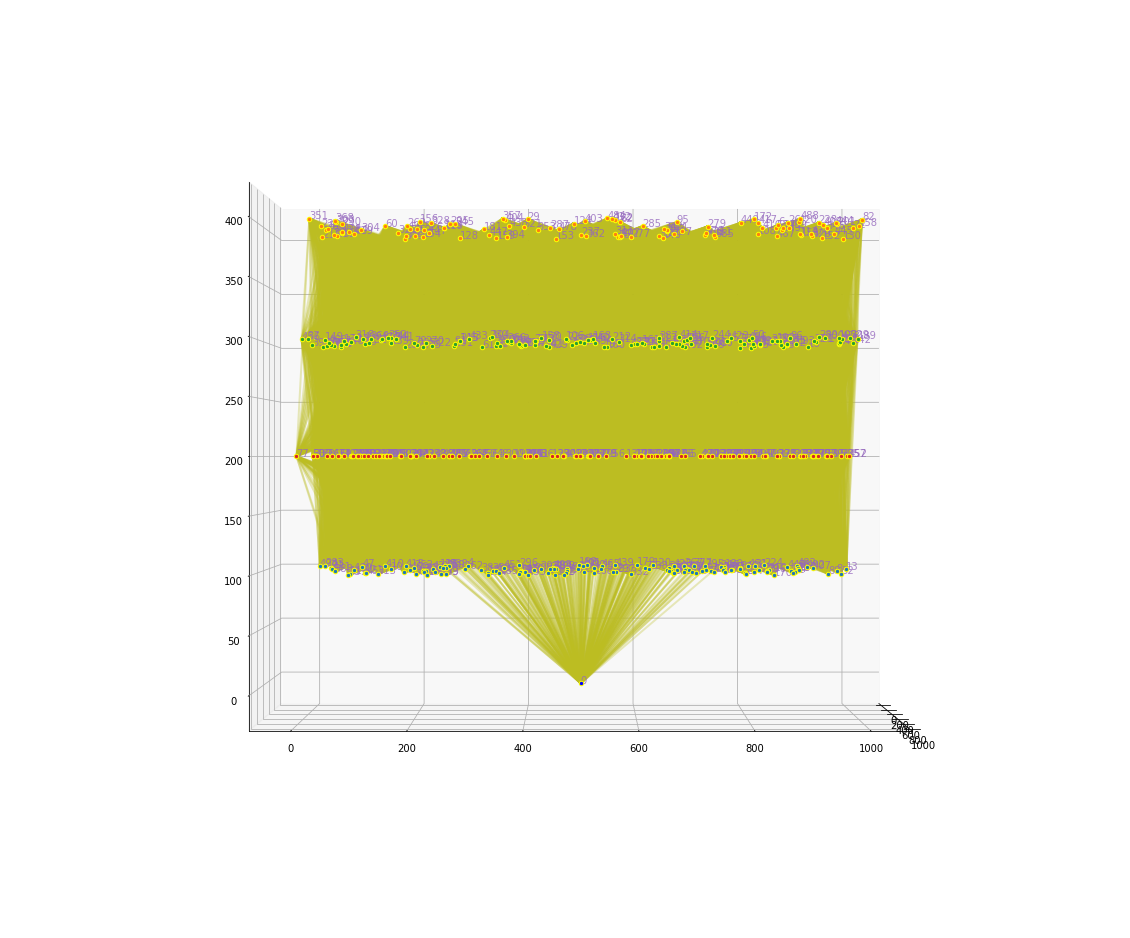

In [13]:
fig = plt.figure(figsize=FIGSIZE)
d = "3d"
ax = fig.add_subplot(111, projection=d)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)

for k in cluster_edges:
    plot_edges(ax, list(cluster_long_graph[k].edges), df["X"], df["Y"], df["Z"], "C8")
    #total_cluster_conv_graph.add_edges_from(cluster_conv_graph[k].edges)
ax.view_init(0,0)
plt.show()

## APL ACC

Finding the Average Path Lenght and Average Clustering Cooeffcient

In [14]:
df_cluster_links = pandas.DataFrame(columns=["AB_edges", "AC_edges", "AD_edges", "BC_edges", "BD_edges", "CD_edges"])

# for i in cluster_edges:
#     print(len(cluster_edges[i].edges))

# df_cluster_links["BC_edges"] = nx.to_pandas_edgelist(cluster_edges["BC_edges"]).apply(tuple,axis=1)
# df_cluster_links["AB_edges"] = nx.to_pandas_edgelist(cluster_edges["AB_edges"]).apply(tuple,axis=1)
# df_cluster_links["AC_edges"] = nx.to_pandas_edgelist(cluster_edges["AC_edges"]).apply(tuple,axis=1)
# df_cluster_links["AD_edges"] = nx.to_pandas_edgelist(cluster_edges["AD_edges"]).apply(tuple,axis=1)
# df_cluster_links["BD_edges"] = nx.to_pandas_edgelist(cluster_edges["BD_edges"]).apply(tuple,axis=1)
# df_cluster_links["CD_edges"] = nx.to_pandas_edgelist(cluster_edges["CD_edges"]).apply(tuple,axis=1)

# #df_cluster_links = pandas.concat([df_cluster_temp2, df_cluster_temp3, df_cluster_temp4, df_cluster_temp5],axis=1)

# #del df_a, df_b, df_c, df_d

# df_cluster_links = df_cluster_links.fillna("NaN")

# #print(len(cluster_edges["CD_edges"].edges),len(cluster_edges["AB_edges"].edges),len(cluster_edges["AC_edges"].edges))
# df_cluster_links
def get_APL_ACC(conv_links, long_links, nodes):
    k = nx.Graph()
    k.add_nodes_from(nodes)
    k.add_edges_from(conv_links)
    k.add_edge(long_links[0], long_links[1])
    #print(k.edges)
    ACC = nx.average_clustering(k) # Average Clustering Coefficient
    APL = nx.average_shortest_path_length(k) # Average Path Length
    # apl_arr.append(APL)
    # acc_arr.append(ACC)
    return APL + (10 * ACC)

for i in cluster_long_graph:
    for j in range(len(cluster_long_graph[i].edges)) :
        cluster_apl_acc[i] = get_APL_ACC(cluster_conv_graph[i].edges, list(cluster_long_graph[i].edges)[j], total_cluster_conv_graph.nodes)

k = nx.Graph()
k.add_nodes_from(total_cluster_conv_graph.nodes)
k.add_edges_from(cluster_conv_graph['AB_edges'].edges)
temp_edge = list(cluster_long_graph["AB_edges"].edges)[0]
k.add_edge(temp_edge[0], temp_edge[1])
print(temp_edge)
#del temp_edge
APL = nx.average_shortest_path_length(k)
ACC = nx.average_clustering(k)
print(ACC)

NetworkXError: ignored

In [ ]:
# df_cluster_weights = pandas.DataFrame(columns=["Long", "APL_ACC"])
# cluster_apl_acc

# df_reward = pandas.DataFrame(columns=["Long", "E_D", "APL_ACC"])

# for i in cluster_long_graph:
#   for j in range(len(cluster_long_graph[i].edges)) :
#     df_cluster_weights.iloc[0:0]
#     df_cluster_weights.loc[len(df_cluster_weights.index)] = [list(cluster_long_graph[i].edges)[j], cluster_apl_acc[j]]

# #df_cluster_weights = df_cluster_weights.eval('Sum = E_D + APL_ACC')
# df_cluster_weights = df_cluster_weights.sort_values("APL_ACC", ascending=False)
# df_cluster_weights

## Energy & Delay

In [19]:
print(cluster_conv_graph["CD_edges"].edges)
rd_len, rd_path = nx.bidirectional_dijkstra(total_cluster_conv_graph, 1, 0)
print(rd_len, rd_path)

[(7.0, 75.0), (7.0, 140.0), (7.0, 277.0), (7.0, 355.0), (7.0, 385.0), (7.0, 9.0), (7.0, 93.0), (7.0, 160.0), (7.0, 199.0), (7.0, 367.0), (7.0, 462.0), (7.0, 469.0), (7.0, 495.0), (75.0, 9.0), (75.0, 93.0), (75.0, 160.0), (75.0, 199.0), (75.0, 461.0), (75.0, 462.0), (75.0, 57.0), (75.0, 140.0), (75.0, 153.0), (75.0, 207.0), (75.0, 237.0), (75.0, 277.0), (75.0, 355.0), (75.0, 362.0), (140.0, 9.0), (140.0, 93.0), (140.0, 160.0), (140.0, 199.0), (140.0, 461.0), (140.0, 462.0), (140.0, 469.0), (140.0, 57.0), (140.0, 207.0), (140.0, 277.0), (140.0, 355.0), (140.0, 362.0), (140.0, 385.0), (277.0, 9.0), (277.0, 93.0), (277.0, 160.0), (277.0, 199.0), (277.0, 461.0), (277.0, 462.0), (277.0, 57.0), (277.0, 153.0), (277.0, 197.0), (277.0, 207.0), (277.0, 237.0), (277.0, 311.0), (277.0, 355.0), (277.0, 362.0), (277.0, 385.0), (355.0, 9.0), (355.0, 93.0), (355.0, 199.0), (355.0, 254.0), (355.0, 461.0), (355.0, 462.0), (355.0, 480.0), (355.0, 487.0), (355.0, 57.0), (355.0, 197.0), (355.0, 207.0), (35

In [16]:
def adding_conv_long_links(conv_links, long_links, nodes):
    k = nx.Graph()
    k.add_nodes_from(nodes)
    k.add_edges_from(conv_links)
    k.add_edge(long_links[0], long_links[1])
    return k

def cluster_get_energy_consumption(distance,conv_dist,ENT12,num_pack):
    m = ENT12*num_pack*128
    E_e = 25 * 1e-9
    E_fs = 10 * 1e-12
    E_mp = E_fs/(conv_dist**2)
    if distance <= conv_dist:
        energy_trans = m*E_e + m * E_fs* distance**2
    else:
        energy_trans = m*E_e + m * E_mp* distance**4;
    energy_recv  = m*E_e;
    return energy_trans, energy_recv


In [17]:
cluster_conv_graph["AB_edges"].edges

EdgeView([(3, 30.0), (3, 76.0), (3, 238.0), (3, 246.0), (3, 261.0), (3, 465.0), (3, 11), (3, 65), (3, 71), (3, 101), (3, 123), (3, 204), (3, 256), (3, 265), (3, 323), (3, 360), (3, 448), (3, 477), (30.0, 11), (30.0, 71), (30.0, 123), (30.0, 204), (30.0, 239), (30.0, 256), (30.0, 360), (30.0, 25.0), (30.0, 203.0), (30.0, 292.0), (30.0, 356.0), (30.0, 382.0), (30.0, 261.0), (30.0, 76.0), (30.0, 238.0), (30.0, 451.0), (30.0, 465.0), (30.0, 493.0), (76.0, 65), (76.0, 71), (76.0, 204), (76.0, 239), (76.0, 477), (76.0, 25.0), (76.0, 292.0), (76.0, 356.0), (76.0, 56.0), (76.0, 144.0), (76.0, 202.0), (76.0, 261.0), (76.0, 459.0), (76.0, 238.0), (238.0, 65), (238.0, 71), (238.0, 186), (238.0, 239), (238.0, 477), (238.0, 25.0), (238.0, 192.0), (238.0, 356.0), (238.0, 56.0), (238.0, 144.0), (238.0, 176.0), (238.0, 202.0), (238.0, 261.0), (238.0, 459.0), (246.0, 67), (246.0, 186), (246.0, 265), (246.0, 448), (246.0, 477), (246.0, 33.0), (246.0, 144.0), (246.0, 261.0), (246.0, 347.0), (246.0, 31.0)

In [18]:
reward = []

C_VAL= 3e8
SPEED = 500e3
BITS = 128


for i in cluster_conv_graph:
    for j in range(len(cluster_long_graph[i].edges)):
#for i in range(len(df_cluster_weights["Long"].values)):
        conv_long_graph = adding_conv_long_links(cluster_conv_graph[i].edges, list(cluster_long_graph[i].edges)[j], total_cluster_conv_graph.nodes)

        initial_delay = final_delay = np.array(np.zeros(shape=(N_DRONES)))
        inital_energy = final_energy = np.array(np.zeros(shape=(N_DRONES)))+20

        num_pkts = np.ones(N_DRONES)
        ENT = np.ones([N_DRONES, N_DRONES]) # number of transmissions
        #print(ENT)

        for k in range(1,N_DRONES):
            rd_len, rd_path = nx.bidirectional_dijkstra(conv_long_graph, k, 0)
            print(rd_len, rd_path)
            k1 = nx.Graph()
            for j in range(len(rd_path)):
                for j1 in range(len(rd_path)):
                    if j+1 == j1:
                        k1.add_edge(rd_path[j],rd_path[j1])
            edges1 = list(k1.edges)
            for p1, p2 in edges1: ## we will calculate the distance and keep the links only if they are less than 500meters
                distance = math.dist(df["Coords"][p1], df["Coords"][p2])
                [energy_trans,energy_recv] = cluster_get_energy_consumption(distance, CONV_DIST, ENT[p1,p2],num_pkts[p1])
                final_energy[p1] = final_energy[p1]-energy_trans
                final_energy[p2] = final_energy[p2]-energy_recv
                q_d = np.random.exponential(scale=0.1e-4, size=None)
                Proc_delay =  np.random.poisson(lam=100, size=None)/1000
                if p2 == 0:
                    final_delay[k] = final_delay[k] + num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED) + q_d + Proc_delay)
                else:
                    final_delay[k] = final_delay[k]+ num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED))

        sum_of_delay = sum(final_delay)
        sum_of_energy = N_DRONES*20-sum(final_energy)
        reward.append(10/(0.5*sum_of_delay + sum_of_energy))

NetworkXNoPath: ignored

# Getting Layer Links

## Finding all possible links

In [23]:
G = nx.Graph()
for i,j in enumerate(df["Coords"]):
    G.add_node(i, pos=j)

k = get_links(G.nodes, G.nodes, G)
G.nodes(data="pos")

NodeDataView({0: (500, 500, 0), 1: (435, 685, 400), 2: (860, 791, 100), 3: (270, 625, 200), 4: (106, 287, 100), 5: (71, 942, 200), 6: (700, 853, 400), 7: (20, 662, 300), 8: (614, 961, 100), 9: (121, 638, 300), 10: (466, 154, 100), 11: (214, 489, 200), 12: (330, 385, 300), 13: (458, 985, 100), 14: (87, 784, 200), 15: (372, 103, 300), 16: (99, 928, 300), 17: (871, 392, 100), 18: (663, 810, 100), 19: (130, 245, 100), 20: (661, 175, 200), 21: (308, 38, 100), 22: (769, 476, 300), 23: (343, 681, 300), 24: (491, 758, 100), 25: (413, 537, 100), 26: (805, 866, 400), 27: (385, 817, 300), 28: (191, 920, 200), 29: (955, 407, 400), 30: (276, 524, 100), 31: (160, 827, 100), 32: (459, 505, 300), 33: (313, 902, 100), 34: (21, 824, 200), 35: (252, 35, 300), 36: (747, 684, 100), 37: (856, 19, 300), 38: (560, 320, 100), 39: (474, 775, 100), 40: (58, 511, 100), 41: (510, 399, 200), 42: (681, 653, 200), 43: (475, 971, 300), 44: (699, 882, 100), 45: (975, 470, 100), 46: (782, 142, 200), 47: (189, 91, 100), 

### Plotting Graph

In [24]:
fig = plt.figure(figsize=FIGSIZE)
d = "3d"
ax = fig.add_subplot(111, projection=d)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)
plot_edges(ax, list(G.edges), df["X"], df["Y"], df["Z"], "C5") # green

Error in callback <function flush_figures at 0x7f267013dd30> (for post_execute):


KeyboardInterrupt: ignored

## Finding conventional links

In [25]:
conv_links = nx.Graph()
conv_links.add_nodes_from(G)
k, d_max = get_conv_links(df["Coords"], df["Coords"], G.edges, CONV_DIST, conv_links)

### Plotting Graph

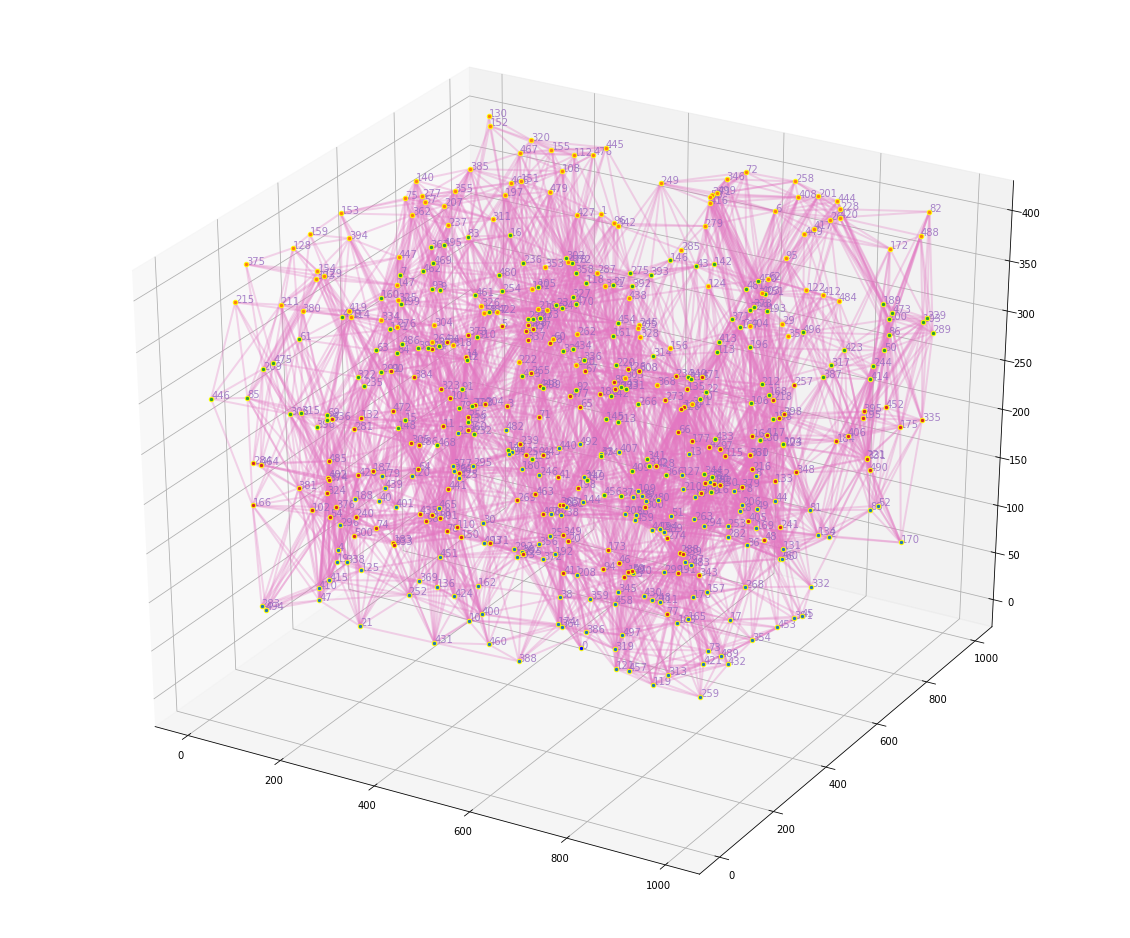

In [26]:
fig = plt.figure(figsize=FIGSIZE)
d = "3d"
ax = fig.add_subplot(111, projection=d)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)
plot_edges(ax, list(conv_links.edges), df["X"], df["Y"], df["Z"], "C6") # green


## Finding long range links

In [27]:
# def get_long_links( node1, node2, edges, conv_dist, d, k):
#     result = np.nan
#     for i,j in edges:
#         result = math.dist(node1[i], node2[j])
#         if (conv_dist <= result) and (result <= 0.5*d):
#             k.add_edge(i, j)
    
#     return k.edges

long_links = nx.Graph()
long_links.add_nodes_from(conv_links)
k = get_long_links(df["Coords"], df["Coords"], G.edges, CONV_DIST, d_max, long_links)

### Plotting Graph

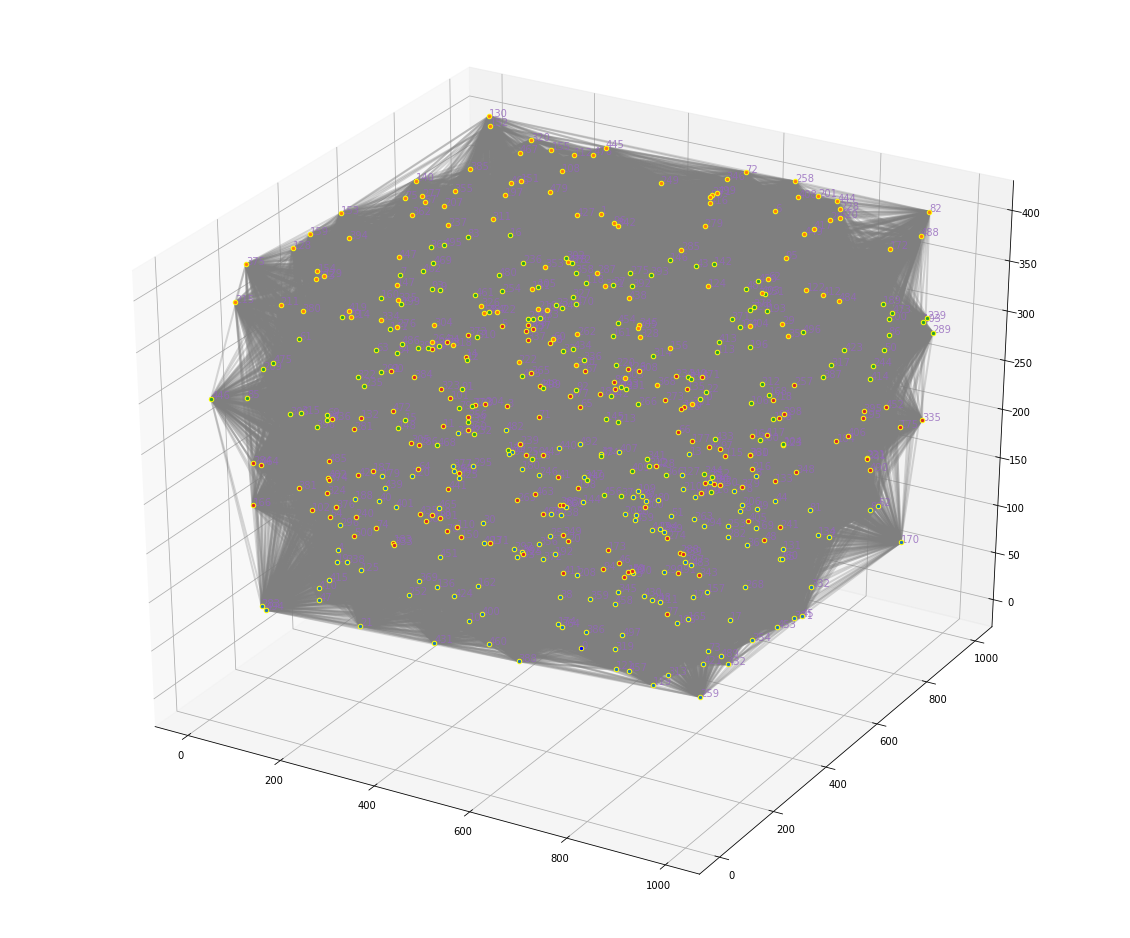

In [28]:
fig = plt.figure(figsize=FIGSIZE)
d = "3d"
ax = fig.add_subplot(111, projection=d)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)
plot_edges(ax, list(long_links.edges), df["X"], df["Y"], df["Z"], "C7") # green

## Creating and adding the values to new Dataframe

In [1]:
df_links = pandas.DataFrame(columns=["links", "conv", "long"])

df_links["links"] = nx.to_pandas_edgelist(G).apply(tuple, axis=1)
df_links["long"] = nx.to_pandas_edgelist(long_links).apply(tuple, axis=1)

for i in range(df_links["long"].size):
    df_links["conv"][i] = list(conv_links.edges)


df_links.to_csv("conv_long.csv")

NameError: ignored

# Getting Layer APL and ACC

In [ ]:
apl_arr = []
acc_arr = []

def get_APL_ACC(conv_links, long_links, nodes):
    k = nx.Graph()
    k.add_nodes_from(nodes)
    k.add_edges_from(conv_links)
    k.add_edge(long_links[0], long_links[1])
    ACC = nx.average_clustering(k) # Average Clustering Coefficient
    APL = nx.average_shortest_path_length(k) # Average Path Length
    apl_arr.append(APL)
    acc_arr.append(ACC)
    return APL + (10 * ACC)

apl_acc = []

for i in range(len(long_links.edges)):
    apl_acc.append(get_APL_ACC(list(conv_links.edges), list(long_links.edges)[i], G))

#print(len(apl_acc))

In [ ]:
print(len(list(long_links.edges)), len(apl_acc))

In [ ]:
plt.figure(figsize=[10,7])

print(len(apl_arr))
print(len(acc_arr))
print(cluster_edges["AB_edges"])

plt.figure(figsize=[12,9])

plt.subplot(211)
plt.title("APL and ACC for small world network")
plt.plot(acc_arr, color='tab:red')
plt.ylabel('ACC')

plt.subplot(212)
plt.plot(apl_arr, color='tab:blue')
plt.xlabel('---')
plt.ylabel('APL')
plt.savefig("small_wold.png")
plt.show()

# Getting Layer Energy and Delay

In [ ]:
def adding_conv_long_links(conv_links, long_links, nodes):
    k = nx.Graph()
    k.add_nodes_from(nodes)
    k.add_edges_from(conv_links)
    k.add_edge(long_links[0], long_links[1])
    return k

def get_energy_consumption(distance,conv_dist,ENT12,num_pack):
    m = ENT12*num_pack*128
    E_e = 25 * 1e-9
    E_fs = 10 * 1e-12
    E_mp = E_fs/(conv_dist**2)
    if distance <= conv_dist:
        energy_trans = m*E_e + m * E_fs* distance**2
    else:
        energy_trans = m*E_e + m * E_mp* distance**4;
    energy_recv  = m*E_e;
    return energy_trans, energy_recv

# def get_energy_delay(graph):
#     rd_len, rd_path = nx.bidirectional_dijkstra(graph, k, 0)
#     k1 = nx.Graph()
#     for j in range(len(rd_path)):
#         for j1 in range(len(rd_path)):
#             if j+1 == j1:
#                 k1.add_edge(rd_path[j],rd_path[j1])
#     edges1 = list(k1.edges)
#     for p1, p2 in edges1: ## we will calculate the distance and keep the links only if they are less than 500meters
#         distance = math.dist(df["Coords"][p1], df["Coords"][p2])
#         [energy_trans,energy_recv] = get_energy_consumption(distance, CONV_DIST, ENT[p1,p2],num_pkts[p1])
#         final_energy[p1] = final_energy[p1]-energy_trans
#         final_energy[p2] = final_energy[p2]-energy_recv
#         q_d = np.random.exponential(scale=0.1e-4, size=None)
#         Proc_delay =  np.random.poisson(lam=100, size=None)/1000
#         if p2 == 0:
#             final_delay[k] = final_delay[k] + num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED) + q_d + Proc_delay)
#         else:
#             final_delay[k] = final_delay[k]+ num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED))
    
#     return final_energy, final_delay

In [ ]:
reward = []

C_VAL= 3e8
SPEED = 500e3
BITS = 128

for i in range(len(long_links.edges)):
    conv_long_graph = adding_conv_long_links(list(conv_links.edges), list(long_links.edges)[i], G)

    initial_delay = final_delay = np.array(np.zeros(shape=(N_DRONES)))
    inital_energy = final_energy = np.array(np.zeros(shape=(N_DRONES)))+20

    num_pkts = np.ones(N_DRONES)
    ENT = np.ones([N_DRONES, N_DRONES]) # number of transmissions
    #print(ENT)

    for k in range(1,N_DRONES):
        rd_len, rd_path = nx.bidirectional_dijkstra(conv_long_graph, k, 0)
        k1 = nx.Graph()
        for j in range(len(rd_path)):
            for j1 in range(len(rd_path)):
                if j+1 == j1:
                    k1.add_edge(rd_path[j],rd_path[j1])
        edges1 = list(k1.edges)
        for p1, p2 in edges1: ## we will calculate the distance and keep the links only if they are less than 500meters
            distance = math.dist(df["Coords"][p1], df["Coords"][p2])
            [energy_trans,energy_recv] = get_energy_consumption(distance, CONV_DIST, ENT[p1,p2],num_pkts[p1])
            final_energy[p1] = final_energy[p1]-energy_trans
            final_energy[p2] = final_energy[p2]-energy_recv
            q_d = np.random.exponential(scale=0.1e-4, size=None)
            Proc_delay =  np.random.poisson(lam=100, size=None)/1000
            if p2 == 0:
                final_delay[k] = final_delay[k] + num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED) + q_d + Proc_delay)
            else:
                final_delay[k] = final_delay[k]+ num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED))

    sum_of_delay = sum(final_delay)
    sum_of_energy = N_DRONES*20-sum(final_energy)
    reward.append(10/(0.5*sum_of_delay + sum_of_energy))

In [ ]:
plt.plot(final_delay)
plt.savefig("E_D_final_delay.png")
plt.show()

### Creating and adding the values to new Dataframe

In [ ]:
df_reward = pandas.DataFrame(columns=["Long", "E_D", "APL_ACC"])

for j in range(len(long_links.edges)):
    df_reward.iloc[0:0]
    df_reward.loc[len(df_reward.index)] = [list(long_links.edges)[j], reward[j], apl_acc[j]]

df_reward = df_reward.eval('Sum = E_D + APL_ACC')
df_reward = df_reward.sort_values("Sum", ascending=False)

In [ ]:
df_reward
#df_reward.to_csv("total_weights.csv")
# index = df_reward.index[0]
# print(df_reward["Long"][index])

# Small World Network

In [ ]:
plot_acc = []
plot_apl = []
no_links = ini_apl = ini_acc = 0
H = nx.Graph()
H.add_edges_from(conv_links.edges)

for i in range(1000):
    index = df_reward.index[i]
    if no_links == 0:
        H.add_edge(df_reward["Long"][index][0],df_reward["Long"][index][1])
        ini_apl = nx.average_shortest_path_length(H)
        ini_acc = nx.average_clustering(H)
        #print(ini_acc)
        no_links += 1
        # plot_acc.append(ini_acc)
        # plot_apl.append(ini_apl)
    else:
        H.add_edge(df_reward["Long"][index+1][0],df_reward["Long"][index+1][1])
        next_apl = nx.average_shortest_path_length(H)
        next_acc = nx.average_clustering(H)
        #print(next_acc,ini_acc,next_apl)
        if next_acc > 0.9*ini_acc:# and next_apl < comp2:  # optimality should be detween jigh6.00695 and low 6.0069
            no_links += 1
            plot_acc.append(next_acc)
            plot_apl.append(next_apl)
        else:
            print(i)
            break



In [ ]:
print((plot_acc))

## Plotting

Plotting the APL and ACC for small world network


In [ ]:
#plt.plot(plot_apl)

plt.figure(figsize=[12,9])

plt.subplot(211)
plt.title("APL and ACC for small world network")
plt.plot(plot_acc, color='tab:red')
plt.ylabel('ACC')

plt.subplot(212)
plt.plot(plot_apl, color='tab:blue')
plt.xlabel('Small World Links')
plt.ylabel('APL')
plt.savefig("small_wold.png")
plt.show()


In [ ]:
print(list(H.edges))
print(list(conv_links.edges))

non_match = []

for i in list(H.edges):
    if i not in list(conv_links.edges):
        non_match.append(i)


Plotting the small world network

In [ ]:
# def plot_edges(fig, edge, nodeX, nodeY, nodeZ, colors):
#     for i,j in edge:
#         x = np.array((nodeX[i],nodeX[j]))
#         y = np.array((nodeY[i],nodeY[j]))
#         z = np.array((nodeZ[i],nodeZ[j]))
#         fig.plot(x,y,z,c=colors,alpha=0.4, label="something", linewidth=2)

fg = plt.figure(figsize=[15,12])
d = "3d"
ax = fg.add_subplot(111, projection=d)

plot_nodes(ax, df["Coords"], LAYER_LENGTH, d)
plot_edges(ax, list(conv_links.edges), df["X"], df["Y"], df["Z"], "C1") # dark
plot_edges(ax, non_match, df["X"], df["Y"], df["Z"], "Black") # Long

plt.savefig("small_wold_network_2d.png")
plt.show()


## Energy Consumption and Delay for small world network

---



In [ ]:
initial_delay = sm_final_delay = np.array(np.zeros(shape=(N_DRONES)))
inital_energy = sm_final_energy = np.array(np.zeros(shape=(N_DRONES)))+20

num_pkts = np.ones(N_DRONES)

sw_final_reward = []

# for k in range(1,N_DRONES):
#     sw_f_energy, sw_f_delay = get_energy_delay(H)


for k in range(1,N_DRONES):
    # print(G)
    rd_len, rd_path = nx.bidirectional_dijkstra(H, k, 0)
    # print(len(rd_path))
    k1 = nx.Graph()
    for j in range(len(rd_path)):
        for j1 in range(len(rd_path)):
            # print(j, j1)
            if j+1 == j1:
                k1.add_edge(rd_path[j],rd_path[j1])
    edges1 = list(k1.edges)
    # print(edges1)
    for p1, p2 in edges1: ## we will calculate the distance and keep the links only if they are less than 500meters
        distance = math.dist(df["Coords"][p1], df["Coords"][p2])
        [energy_trans,energy_recv] = get_energy_consumption(distance, CONV_DIST, ENT[p1,p2],num_pkts[p1])
        sm_final_energy[p1] = sm_final_energy[p1]-energy_trans
        sm_final_energy[p2] = sm_final_energy[p2]-energy_recv
        q_d = np.random.exponential(scale=0.1e-4, size=None)
        Proc_delay =  np.random.poisson(lam=100, size=None)/1000
        if p2 == 0:
            sm_final_delay[k] = sm_final_delay[k] + num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED) + q_d + Proc_delay)
        else:
            sm_final_delay[k] = sm_final_delay[k]+ num_pkts[p1]*((distance/C_VAL) + (ENT[p1,p2]*BITS/SPEED))
    
sw_sum_of_delay = sum(sm_final_delay)
sw_sum_of_energy = N_DRONES*20-sum(sm_final_energy)
sw_final_reward.append(10/(0.5*sw_sum_of_delay + sw_sum_of_energy))



In [ ]:
plt.plot(final_delay)
plt.savefig("sm_final_delay.png")
plt.show()